# Demonstration 2: Cliff Walking

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import CliffWalking
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Value Iteration

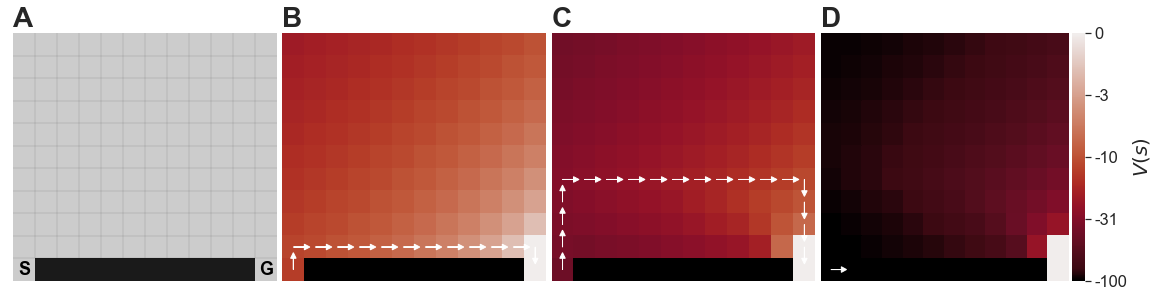

In [2]:
from sisyphus.mdp import ValueIteration
from matplotlib.colors import LinearSegmentedColormap
from palettable.cmocean.sequential import Amp_20_r as palette

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
betas = [1.0, 0.8, 0.6]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Value iteration.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize environment.
gym = CliffWalking()

## Preallocate space.
V = np.zeros((3,*gym.shape))
pi = []

for i, beta in enumerate(betas):
    
    ## Initialize value iteration.
    qvi = ValueIteration(policy='betamax', gamma=1, beta=beta)
    
    ## Solve for Q-values.
    qvi = qvi.fit(gym, verbose=False)
    V[i] = qvi.V.reshape(gym.shape)
    
    ## Solve for policy.
    pi.append( qvi.pi )
    
## Fill in terminal states.
V[:,-1, 1:] = -100
V[:,-1, -1] = 0

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
## Initialize figure.
fig = plt.figure(figsize=(16,4))
colors = palette.hex_colors
colors.insert(0,'k')
cmap = LinearSegmentedColormap.from_list('Amp_21_r', colors)

## Initialize plots and divider.
gs = gridspec.GridSpec(1,4)
gs.update(left=0.01, right=0.94, bottom=0.04, top=0.9, hspace=0, wspace=0.02)

## Plot environment.
annot_kws = annot_kws=dict(fontsize=18,fontweight='semibold',color='k')
ax = gym.plot_cliff(annot_kws=annot_kws, ax=plt.subplot(gs[0]))
ax.text(0,0,'A',ha='left',va='bottom',fontsize=28,fontweight='bold')

## Scale values for clarity.
Vscale = -np.log(np.abs(V)+1)

## Iteratively plot.
for i, (beta, title) in enumerate(zip(betas, ['B','C','D'])):
    
    ## Initialize canvas.
    ax = plt.subplot(gs[i+1])
    
    if i < 2: 
        
        ## Plot heatmap.
        sns.heatmap(Vscale[i], cmap=cmap, vmin=-4.61, vmax=0, cbar=False, ax=ax)
        
    else:
        
        ## Divide canvas for colorbar.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        
        ## Plot heatmap.
        ax = sns.heatmap(Vscale[i], vmin=-4.61, vmax=0, cmap=cmap, cbar=True, ax=ax, cbar_ax=cax)
        
        ## Update heatmap ticklabels.
        cbar = ax.collections[0].colorbar
        cbar.set_ticks(-np.linspace(0,4.61,5))
        ticklabels = -np.exp(np.linspace(0,4.61,5)).astype(int)
        ticklabels[0] = 0
        cbar.set_ticklabels(ticklabels)
    
    ## Plot policy.
    ax = gym.plot_policy(ax, pi[i])
    
    ## Clean up image.
    ax.set(xticklabels=[], yticklabels=[])
    ax.text(0,0,title,ha='left',va='bottom',fontsize=28,fontweight='bold')
    
## Update colobar.
cbar = ax.collections[0].colorbar
cbar.set_label(r'$V(s)$', fontsize=20)
    
plt.savefig('figures/02_cliff.png', dpi=180)